In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
import spacy.cli 
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Performing Initial Analysis of Data

### Data Cleaning and Preparation

In [4]:
#hashtag_data = pd.read_csv('complete_data.csv')
phrase_data = pd.read_csv('july_data.csv')

In [5]:
#hashtag_data.drop('Unnamed: 0',axis=1,inplace=True)
phrase_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#hashtag_data.head()

In [7]:
phrase_data.head()

,tweet,likes,date_posted,id
0,I wonder how fans of the six English clubs tha...,0,2021-07-30 21:00:23,1421214110558179328
1,"European Super League: Barcelona, Real Madrid ...",0,2021-07-30 20:29:05,1421206233810448394
2,"Told you, it wasn't going away. Do you really ...",0,2021-07-30 20:24:41,1421205126803505155
3,"#SuperLeague. This is going to happen, eventua...",0,2021-07-30 20:22:30,1421204576938741767
4,The problem with the battle between #UEFA and ...,1,2021-07-30 20:08:18,1421201001542045697


In [8]:
text = phrase_data.tweet

In [9]:
sentences = []

for i in text:
  sentences.append(i)

In [10]:
split_words = []

for sentence in sentences:
  words = sentence.split()
  for word in words:
    split_words.append(word.lower())


In [11]:
#removing punctuation
split_words_np = [re.sub('r*[^A-Za-z0-9]+','',x) for x in split_words]
for word in split_words_np:
  if word.startswith('http'):
    split_words_np.remove(word)
split_words_np

['i',
 'wonder',
 'how',
 'fans',
 'of',
 'the',
 'six',
 'english',
 'clubs',
 'that',
 'tried',
 'to',
 'start',
 'the',
 'european',
 'super',
 'league',
 'will',
 'react',
 'to',
 'what',
 'has',
 'now',
 'european',
 'super',
 'league',
 'barcelona',
 'real',
 'madrid',
 'and',
 'juventus',
 'will',
 'continue',
 'with',
 'plans',
 'europeansuperleague',
 'told',
 'you',
 'it',
 'wasnt',
 'going',
 'away',
 'do',
 'you',
 'really',
 'think',
 'football',
 'is',
 'for',
 'the',
 'fans',
 'its',
 'always',
 'been',
 'about',
 'money',
 'even',
 'mo',
 'superleague',
 'this',
 'is',
 'going',
 'to',
 'happen',
 'eventually',
 'just',
 'like',
 'somethings',
 'in',
 'life',
 'fans',
 'will',
 'come',
 'around',
 'to',
 'accept',
 'th',
 'the',
 'problem',
 'with',
 'the',
 'battle',
 'between',
 'uefa',
 'and',
 'the',
 'europeansuperleague',
 'is',
 'that',
 'no',
 'side',
 'is',
 'the',
 'good',
 'guy',
 'barcelona',
 'real',
 'madrid',
 'and',
 'juventus',
 'say',
 'they',
 'will',

In [12]:
#stemming words to their root

english_stemmer = SnowballStemmer(language='english')

stemmed_words = []
for word in split_words_np:
  stemmed_words.append(english_stemmer.stem(word))

In [13]:
sw = stopwords.words('english')
sw.append('rt')
sw.append('http')

In [14]:
#removing stop words
clean_words = []

for i in stemmed_words:
  if i not in sw:
    clean_words.append(i)

In [15]:
clean_words_df = pd.DataFrame(clean_words, columns=['words'])

In [16]:
word_frequency = clean_words_df.words.value_counts()

### Word Frequencies and Entity Recognition

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


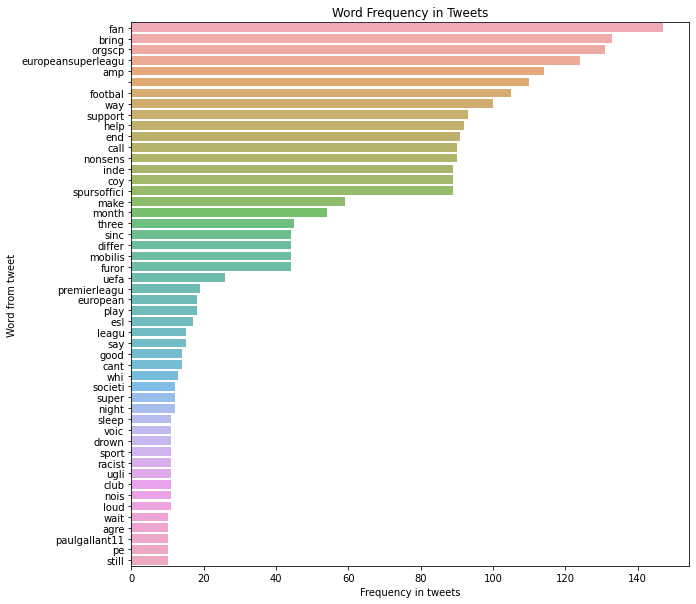

In [17]:
#Graphing word frequency

plt.figure(figsize=(10,10))
sns.barplot(word_frequency.values[:50],word_frequency.index[:50],alpha=.8)
plt.title('Word Frequency in Tweets')
plt.ylabel('Word from tweet')
plt.xlabel('Frequency in tweets')
plt.show()

In [18]:
#Basic Entity recognition using spacy
str1 = ' '
stem2 = str1.join(clean_words)
stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df_6 = pd.DataFrame(label,columns=['Word','Entity'])

In [19]:
df_6

,Word,Entity
0,six,CARDINAL
1,english,LANGUAGE
2,european,NORP
3,european,NORP
4,leagu barcelona,ORG
...,...,...
586,dreamstim,PERSON
587,uefa,ORG
588,uefa,ORG
589,impos real madrid,ORG


In [20]:
df_6.Entity.unique()

array(['CARDINAL', 'LANGUAGE', 'NORP', 'ORG', 'GPE', 'PERSON', 'PRODUCT',
       'FAC', 'DATE', 'WORK_OF_ART', 'EVENT', 'LAW', 'ORDINAL',
       'QUANTITY', 'TIME', 'LOC'], dtype=object)

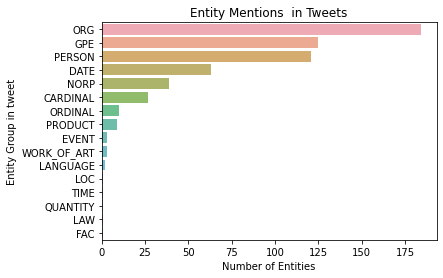

In [42]:
ent_df = df_6.Entity.value_counts()

sns.barplot(y = ent_df.index,x = ent_df.values,alpha=.8)
plt.title('Entity Mentions  in Tweets')
plt.ylabel('Entity Group in tweet')
plt.xlabel('Number of Entities')
plt.show()

In [21]:
money_df = df_6.where(df_6['Entity']=='MONEY')
org_df = df_6.where(df_6['Entity']=='ORG')
norp_df = df_6.where(df_6['Entity']=='NORP')
per_df = df_6.where(df_6['Entity'] == 'PERSON')

In [22]:
money_df = money_df['Word'].value_counts()
org_df = org_df['Word'].value_counts()
norp_df = norp_df['Word'].value_counts()
per_df = per_df['Word'].value_counts()

Text(0.5, 0, 'Frequency in tweets')

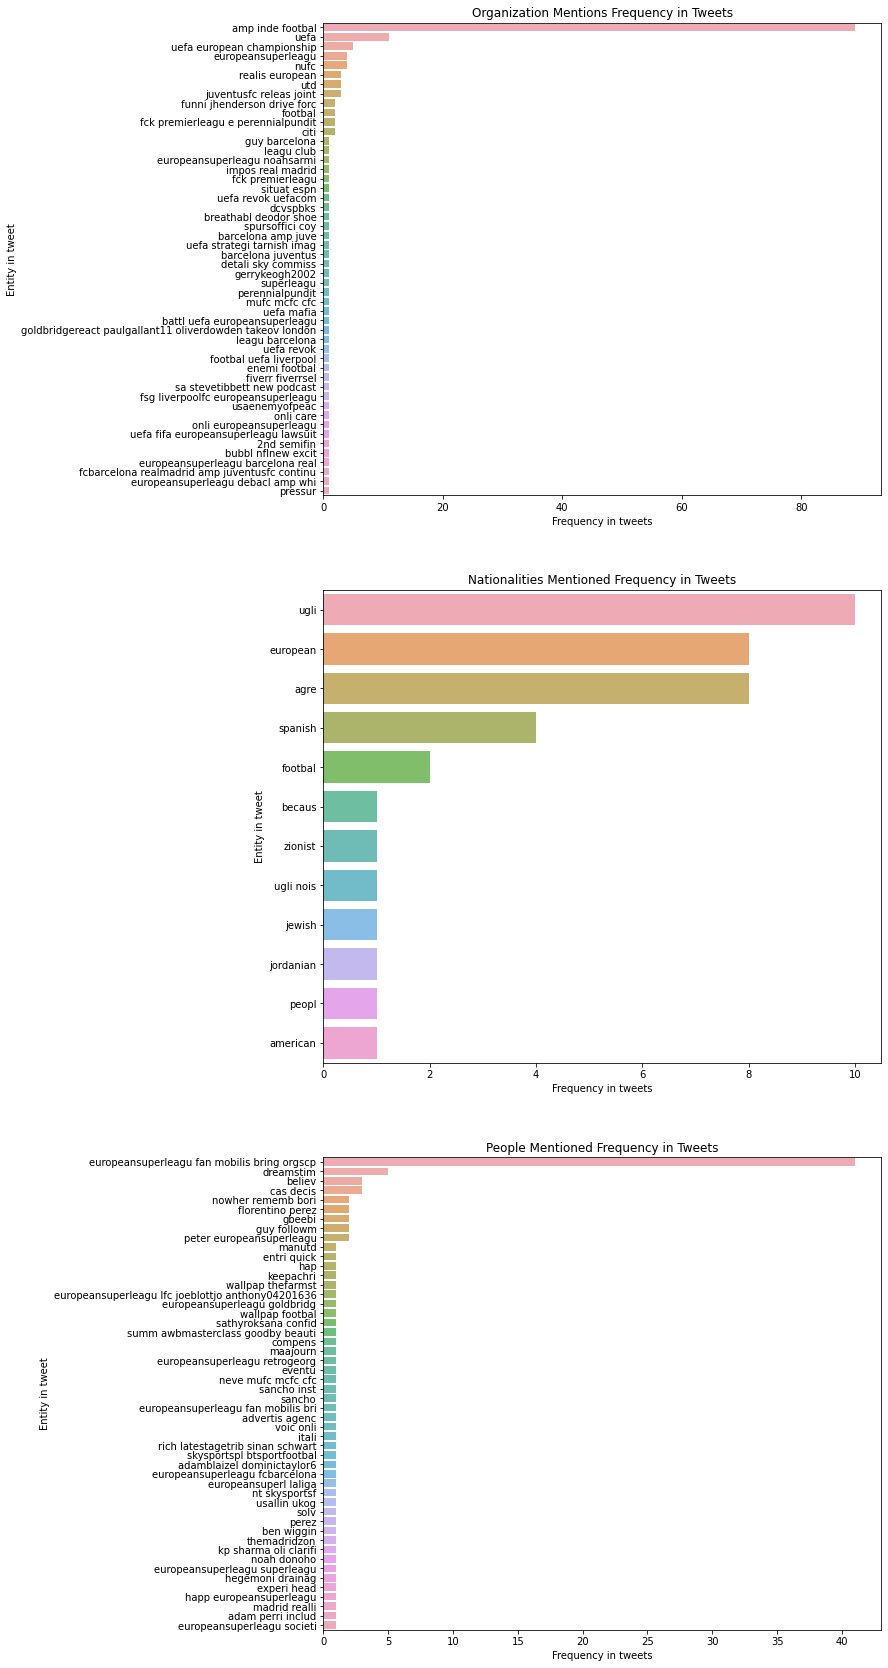

In [25]:
plt.figure(figsize=(10,40))
#money mentions
# plt.subplot(4,1,1)
# sns.barplot(x = money_df.values[:50], y = money_df.index[:50],alpha=.8)
# plt.title('Money Mentions Frequency in Tweets')
# plt.ylabel('Entity in tweet')
# plt.xlabel('Frequency in tweets')
#org mentions
plt.subplot(4,1,2)
sns.barplot(x = org_df.values[:50],y = org_df.index[:50],alpha=.8)
plt.title('Organization Mentions Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
#norp mentions
plt.subplot(4,1,3)
sns.barplot(x = norp_df.values[:50],y = norp_df.index[:50],alpha=.8)
plt.title('Nationalities Mentioned Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')

#people mentions
plt.subplot(4,1,4)
sns.barplot(x = per_df.values[:50],y = per_df.index[:50],alpha=.8)
plt.title('People Mentioned Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')


## Analysis for Data during announcement

In [26]:
announcement_data = pd.read_csv("announcement_data.csv")

In [27]:
text_2 = announcement_data.tweet
sentences_2 = []

for i in text_2:
  sentences_2.append(i)

split_words_2 = []

for sentence in sentences_2:
  words = sentence.split()
  for word in words:
    split_words_2.append(word.lower())

#removing punctuation
split_words_np_2 = [re.sub('r*[^A-Za-z0-9]+','',x) for x in split_words_2]
for word in split_words_np_2:
  if word.startswith('http') or word.startswith('rt'):
    split_words_np_2.remove(word)

#stemming words to their root

english_stemmer = SnowballStemmer(language='english')

stemmed_words_2 = []
for word in split_words_np_2:
  stemmed_words_2.append(english_stemmer.stem(word))

#removing stop words
clean_words_2 = []

for i in stemmed_words_2:
  if i not in sw:
    clean_words_2.append(i)

clean_words_df_2 = pd.DataFrame(clean_words_2, columns=['words'])
word_frequency_2 = clean_words_df_2.words.value_counts()

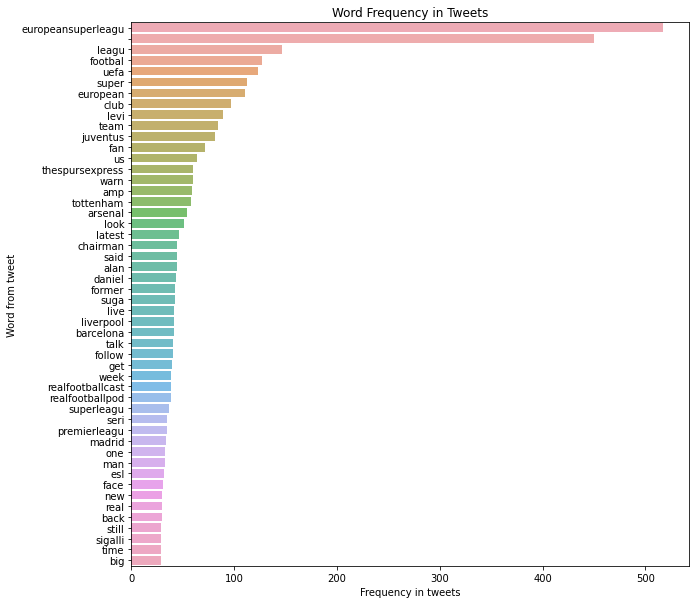

In [28]:
#Graphing word frequency
plt.figure(figsize=(10,10))
sns.barplot(x = word_frequency_2.values[:50],y = word_frequency_2.index[:50],alpha=.8)
plt.title('Word Frequency in Tweets')
plt.ylabel('Word from tweet')
plt.xlabel('Frequency in tweets')
plt.show()

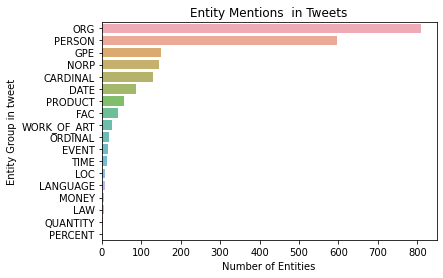

In [40]:
ent_df_a = df_announcement.Entity.value_counts()

sns.barplot(y = ent_df_a.index,x = ent_df_a.values,alpha=.8)
plt.title('Entity Mentions  in Tweets')
plt.ylabel('Entity Group in tweet')
plt.xlabel('Number of Entities')
plt.show()

Text(0.5, 0, 'Frequency in tweets')

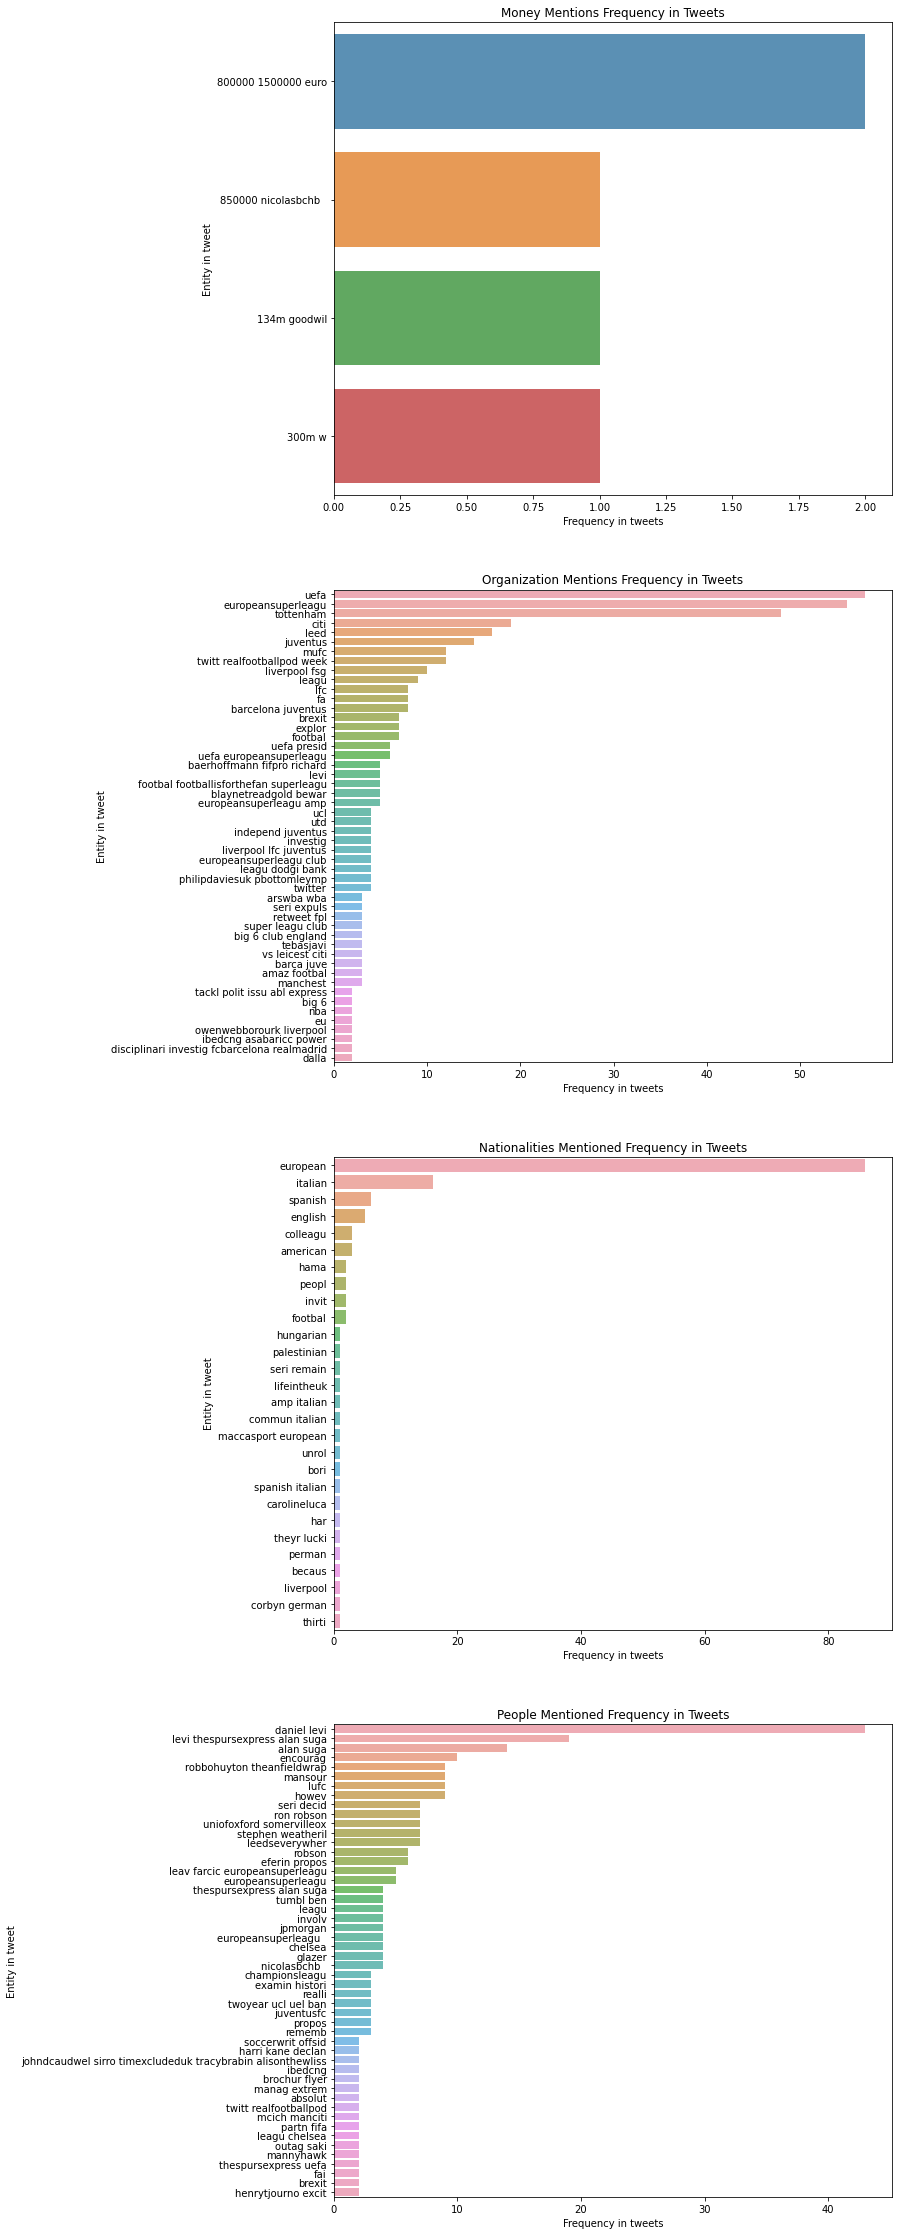

In [29]:
#Basic Entity recognition using spacy
str2 = ' '
stem = str2.join(clean_words_2)
stem = nlp(stem)

label = [(X.text, X.label_) for X in stem.ents]

df_announcement = pd.DataFrame(label,columns=['Word','Entity'])

money_df_a = df_announcement.where(df_announcement['Entity']=='MONEY')
org_df_a = df_announcement.where(df_announcement['Entity']=='ORG')
norp_df_a = df_announcement.where(df_announcement['Entity']=='NORP')
per_df_a = df_announcement.where(df_announcement['Entity']== 'PERSON')

money_df_a = money_df_a['Word'].value_counts()
org_df_a = org_df_a['Word'].value_counts()
norp_df_a = norp_df_a['Word'].value_counts()
per_df_a = per_df_a['Word'].value_counts()

plt.figure(figsize=(10,40))
#money mentions
plt.subplot(4,1,1)
sns.barplot(x = money_df_a.values[:50], y = money_df_a.index[:50],alpha=.8)
plt.title('Money Mentions Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
#org mentions
plt.subplot(4,1,2)
sns.barplot(x = org_df_a.values[:50],y = org_df_a.index[:50],alpha=.8)
plt.title('Organization Mentions Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
#norp mentions
plt.subplot(4,1,3)
sns.barplot(x = norp_df_a.values[:50],y = norp_df_a.index[:50],alpha=.8)
plt.title('Nationalities Mentioned Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')
#person mentions
plt.subplot(4,1,4)
sns.barplot(x = per_df_a.values[:50],y = per_df_a.index[:50],alpha=.8)
plt.title('People Mentioned Frequency in Tweets')
plt.ylabel('Entity in tweet')
plt.xlabel('Frequency in tweets')

